<a href="https://colab.research.google.com/github/fakharzadehAmir/Function-Prediction/blob/main/Function_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [30]:
def plot_functions(func_dict):
    plt.figure(figsize=(9, 6))

    for i, (func_num, details) in enumerate(func_dict.items(), 1):
        plt.subplot(2, 3, i)
        plt.plot(details['x'], details['y'], label=details['label'])
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title(f"Function {func_num}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

    plt.tight_layout()
    plt.show()

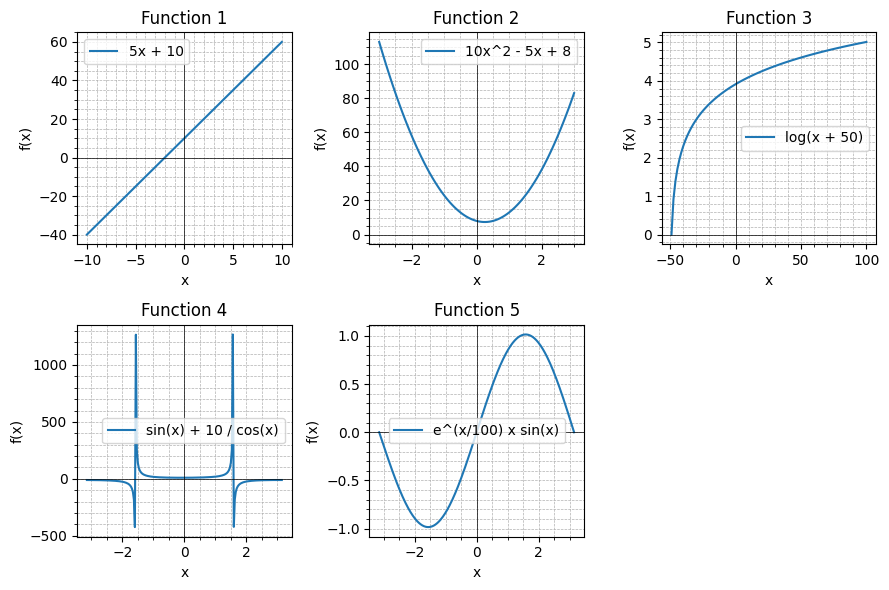

In [31]:
def function_1(x):
  return 5*x + 10

def function_2(x):
  return 10*(x**2) - (5*x) + 8

def function_3(x):
  return np.log(x + 50)

def function_4(x):
  return np.sin(x) + 10 / np.cos(x)

def function_5(x):
  return np.sin(x) * np.exp(0.01 * x)


x_values_func1 = np.linspace(-10, 10, 50)
x_values_func2 = np.linspace(-3, 3, 100)
x_values_func3 = np.linspace(-49, 100, 100)
x_values_func4 = np.linspace(-1*np.pi, np.pi, 200)
x_values_func5 = np.linspace(-1*np.pi, np.pi, 350)

func_dict_1 = {
    1: {'x': x_values_func1, 'y': function_1(x_values_func1), 'label': "5x + 10"},
    2: {'x': x_values_func2, 'y': function_2(x_values_func2), 'label': "10x^2 - 5x + 8"},
    3: {'x': x_values_func3, 'y': function_3(x_values_func3), 'label': "log(x + 50)"},
    4: {'x': x_values_func4, 'y': function_4(x_values_func4), 'label': "sin(x) + 10 / cos(x)"},
    5: {'x': x_values_func5, 'y': function_5(x_values_func5), 'label': "e^(x/100) x sin(x)"},
}

plot_functions(func_dict_1)

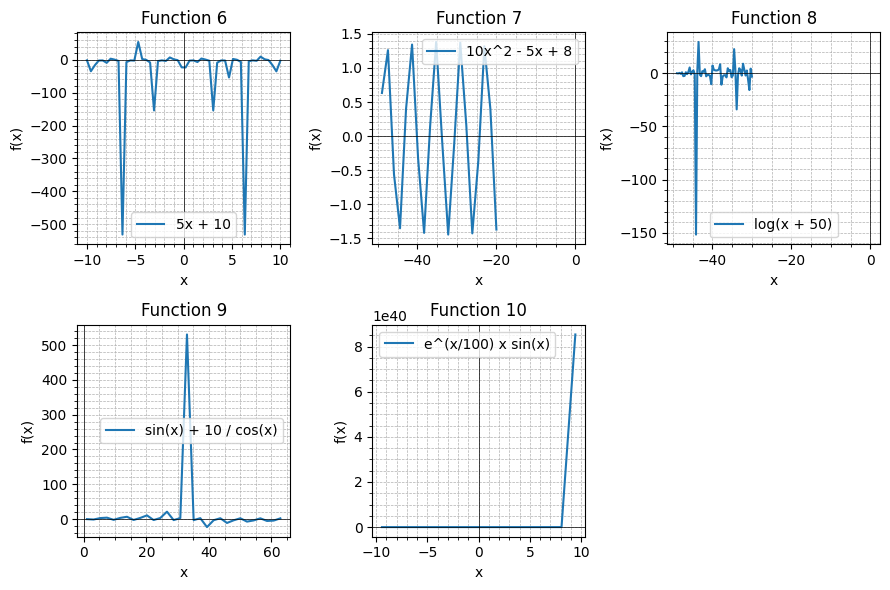

In [32]:
def function_6(x):
  return -1 * ((1 / np.tan(x) ** 2 ) + (np.tan(x) + 1e-5))

def function_7(x):
  return np.sin(x) - np.cos(x) + 1/x

def function_8(x):
  return np.exp(0.01 * x) * np.log(x + 50 + 1e-5) / np.cos(0.5 * (x**2))

def function_9(x):
  return 1 / (np.cos(x) + 1e-5) * np.log(x + 1e-5) / np.exp(0.01 * x)

def function_10(x):
  return (np.exp(10 * x))


x_values_func6 = np.linspace(-10, 10, 50)
x_values_func7 = np.linspace(-49, -20, 20)
x_values_func8 = np.linspace(-49, -30, 60)
x_values_func9 = np.linspace(1, 20*np.pi, 30)
x_values_func10 = np.linspace(-3*np.pi, 3*np.pi, 15)

func_dict_2 = {
    6: {'x': x_values_func6, 'y': function_6(x_values_func6), 'label': "5x + 10"},
    7: {'x': x_values_func7, 'y': function_7(x_values_func7), 'label': "10x^2 - 5x + 8"},
    8: {'x': x_values_func8, 'y': function_8(x_values_func8), 'label': "log(x + 50)"},
    9: {'x': x_values_func9, 'y': function_9(x_values_func9), 'label': "sin(x) + 10 / cos(x)"},
    10: {'x': x_values_func10, 'y': function_10(x_values_func10), 'label': "e^(x/100) x sin(x)"},
}

plot_functions(func_dict_2)

In [33]:
def model_comparison_plot(x_train, x_test, y_train, y_test, y_pred_list):
    plt.figure(figsize=(20, 9))

    plt.subplot(4, 3, 1)
    plt.scatter(x_train, y_train, color='blue', label='Training data')
    plt.scatter(x_test, y_test, color='red', label='Testing data')
    plt.title('Training and Testing Data')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    for i, (key, y_pred) in enumerate(y_pred_list.items(), start=2):
        plt.subplot(4, 3, i)
        plt.scatter(x_test, y_test, color='red', label='Actual Test Data')
        plt.scatter(x_test, y_pred, color='green', label='Predicted Data', alpha=0.8)
        plt.title(f'{key} - Test vs. Predicted')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

def mlp_model1(type):
  match type:
    case 1:
      return MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=4000, random_state=42)
    case 2:
      return MLPRegressor(hidden_layer_sizes=(150, 100), activation='relu', max_iter=3500, random_state=42)
    case 3:
      return MLPRegressor(hidden_layer_sizes=(100, 75, 50), activation='tanh', max_iter=5000, random_state=42)
    case 4:
      return MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=6000, random_state=42)
    case 5:
      return MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', max_iter=4000, early_stopping=True, random_state=42)
    case _ :
      return

def mlp_model2(type):
  match type:
    case 1:
      return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', max_iter=5000, random_state=42))
    case 2:
      return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=4500, random_state=42, alpha=0.001, early_stopping=True))
    case 3:
      return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(120, 80, 40), activation='relu', max_iter=5000, random_state=42),)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
import pandas as pd

In [36]:
def training_models(dictionary, function):
  x_train, x_test, y_train, y_test = train_test_split(dictionary[function]['x'].reshape(-1, 1), dictionary[function]['y'], test_size=0.2, random_state=42)
  metrics_results = {
        'Model Type': [],
        'MSE': [],
        'F1 Score': [],
        'Accuracy': [],
        'Test Score': [],
    }
  y_pred_list = {}
  y_test_binary = (y_test > 0.5).astype(int)
  for model_type in range(1, 7):
      model = mlp_model1(model_type)
      if model:
          model.fit(x_train, y_train)
          y_pred = model.predict(x_test)
          y_pred_binary = (y_pred > 0.5).astype(int)
          y_pred_list[f'Model1_Type{model_type}'] = y_pred
          metrics_results['Model Type'].append(f'Model1_Type{model_type}')
          metrics_results['MSE'].append(mean_squared_error(y_test, y_pred))
          metrics_results['F1 Score'].append(f1_score(y_test_binary, y_pred_binary))
          metrics_results['Accuracy'].append(accuracy_score(y_test_binary, y_pred_binary))
          metrics_results['Test Score'].append(model.score(x_test, y_test))


  for model_type in range(1, 6):
      model = mlp_model2(model_type)
      if model:
          model.fit(x_train, y_train)
          y_pred = model.predict(x_test)
          y_pred_list[f'Model2_Type{model_type}'] = y_pred
          y_pred_binary = (y_pred > 0.5).astype(int)
          metrics_results['Model Type'].append(f'Model2_Type{model_type}')
          metrics_results['MSE'].append(mean_squared_error(y_test, y_pred))
          metrics_results['F1 Score'].append(f1_score(y_test_binary, y_pred_binary))
          metrics_results['Accuracy'].append(accuracy_score(y_test_binary, y_pred_binary))
          metrics_results['Test Score'].append(model.score(x_test, y_test))



  print(pd.DataFrame(metrics_results))
  model_comparison_plot(x_train, x_test, y_train, y_test, y_pred_list)

Function 1

     Model Type         MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1    0.055753       1.0       1.0    0.999893
1  Model1_Type2   18.945679       1.0       1.0    0.963621
2  Model1_Type3    0.213229       1.0       1.0    0.999591
3  Model1_Type4    0.076948       1.0       1.0    0.999852
4  Model1_Type5  930.242911       0.0       0.3   -0.786239
5  Model2_Type1    0.067214       1.0       1.0    0.999871
6  Model2_Type2   11.734343       1.0       1.0    0.977468
7  Model2_Type3    0.002215       1.0       1.0    0.999996


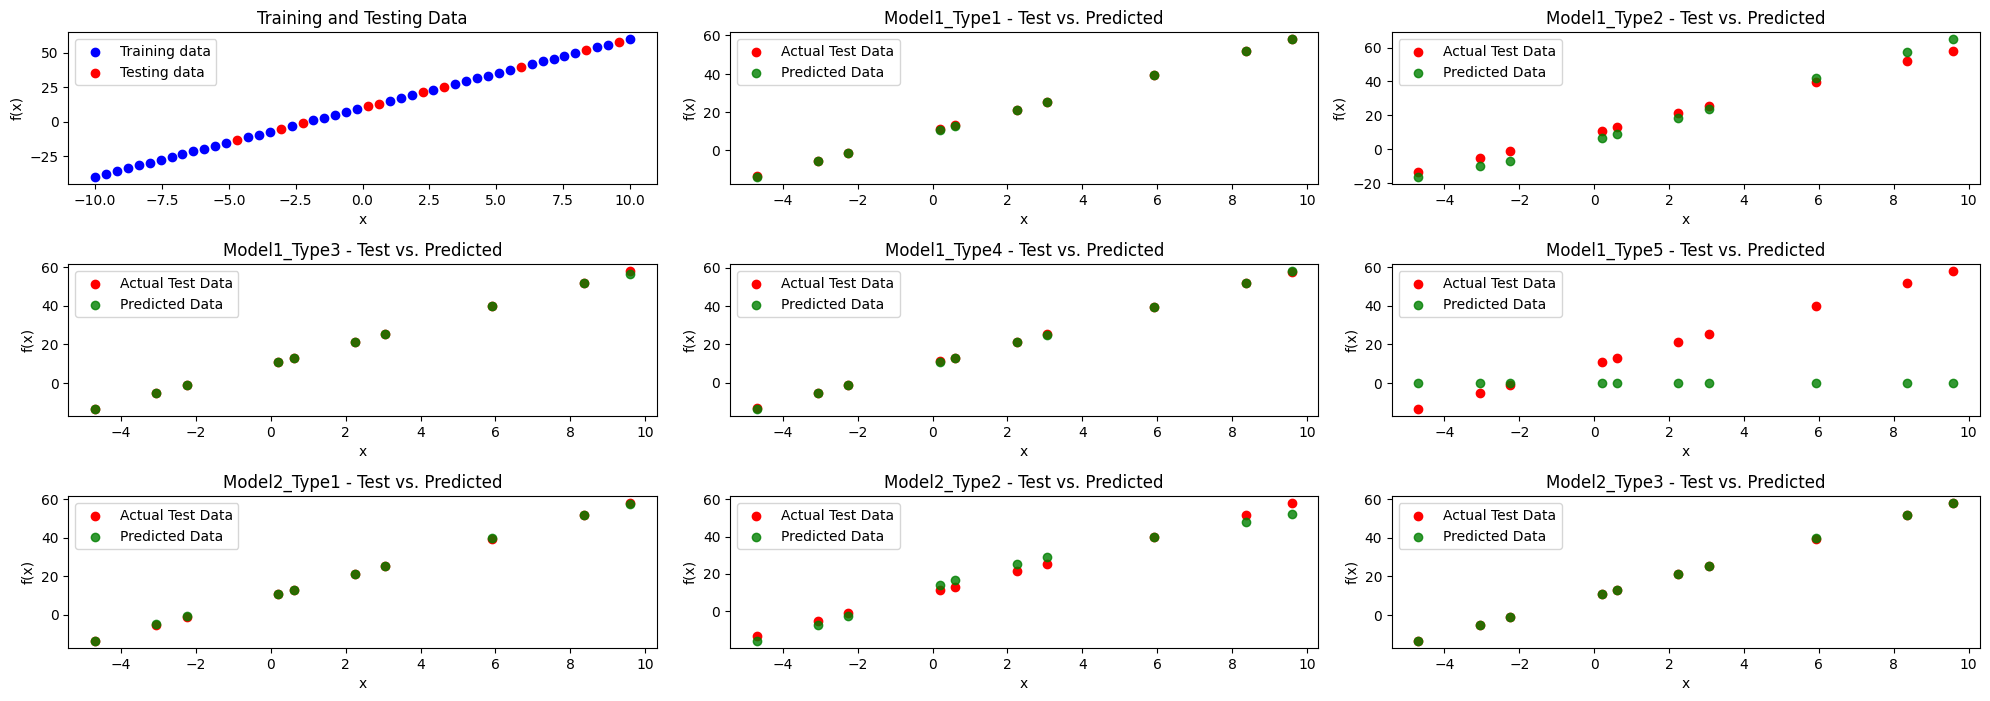

In [37]:
training_models(func_dict_1, 1)

Function 2

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model Type         MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1    7.706929       1.0       1.0    0.990841
1  Model1_Type2    0.280701       1.0       1.0    0.999666
2  Model1_Type3  844.280654       1.0       1.0   -0.003371
3  Model1_Type4    3.373406       1.0       1.0    0.995991
4  Model1_Type5  855.513425       1.0       1.0   -0.016721
5  Model2_Type1    0.271817       1.0       1.0    0.999677
6  Model2_Type2   26.589914       1.0       1.0    0.968400
7  Model2_Type3    0.085425       1.0       1.0    0.999898


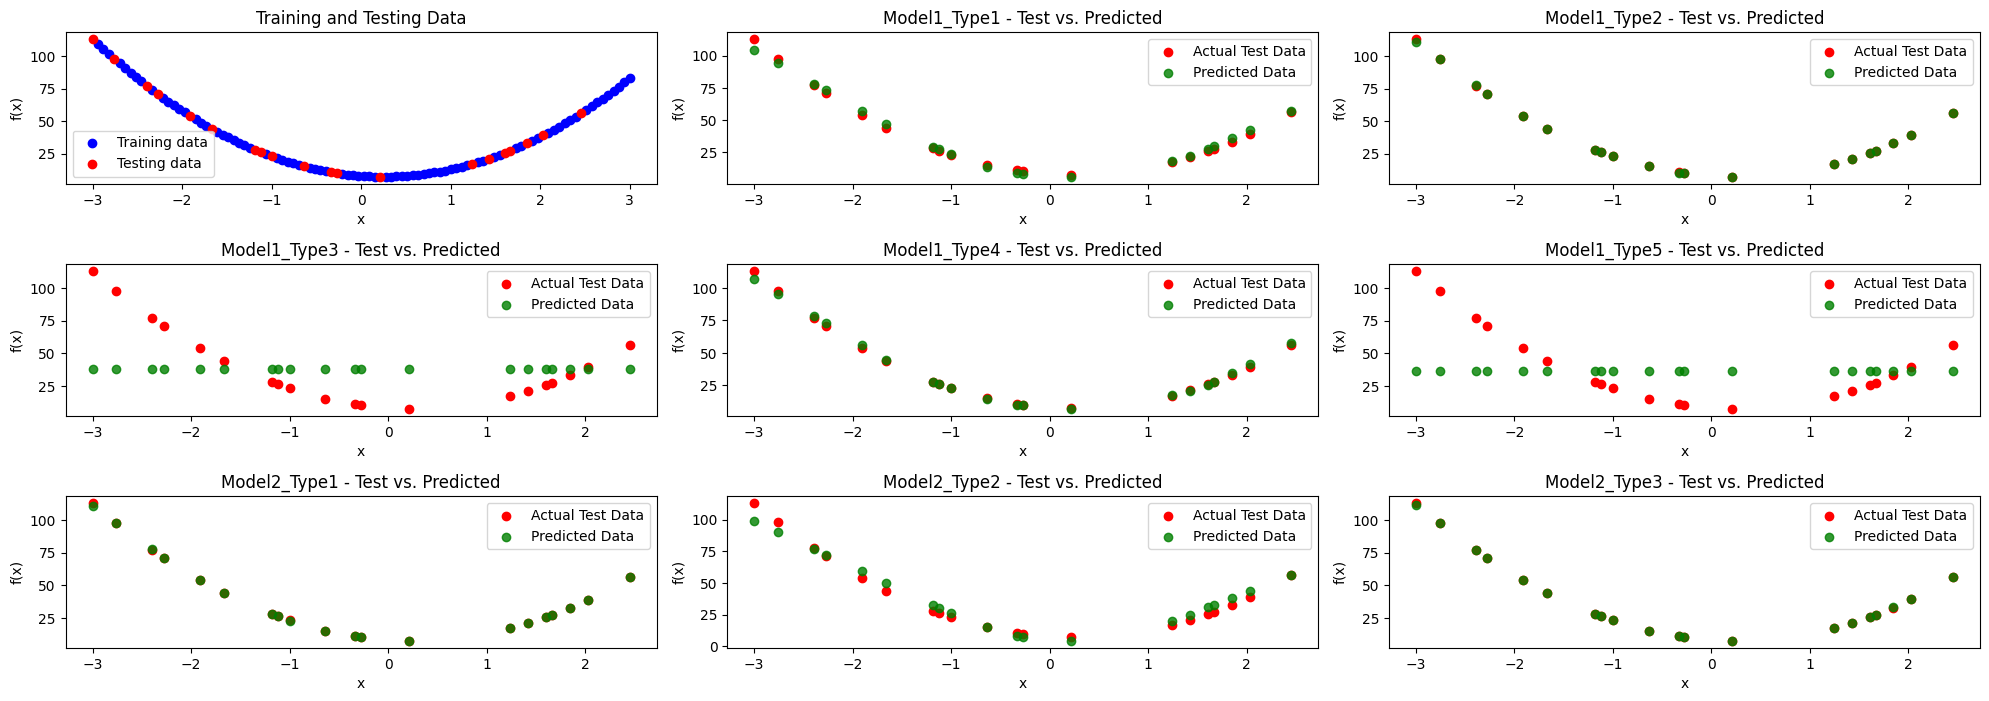

In [38]:
training_models(func_dict_1, 2)

Function 3

     Model Type       MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  6.342151  0.888889      0.80   -3.622540
1  Model1_Type2  0.163234  0.974359      0.95    0.881025
2  Model1_Type3  0.341276  0.974359      0.95    0.751258
3  Model1_Type4  4.794319  0.888889      0.80   -2.494387
4  Model1_Type5  0.293866  0.974359      0.95    0.785813
5  Model2_Type1  0.182310  0.974359      0.95    0.867121
6  Model2_Type2  0.240245  0.974359      0.95    0.824895
7  Model2_Type3  0.170487  0.974359      0.95    0.875739


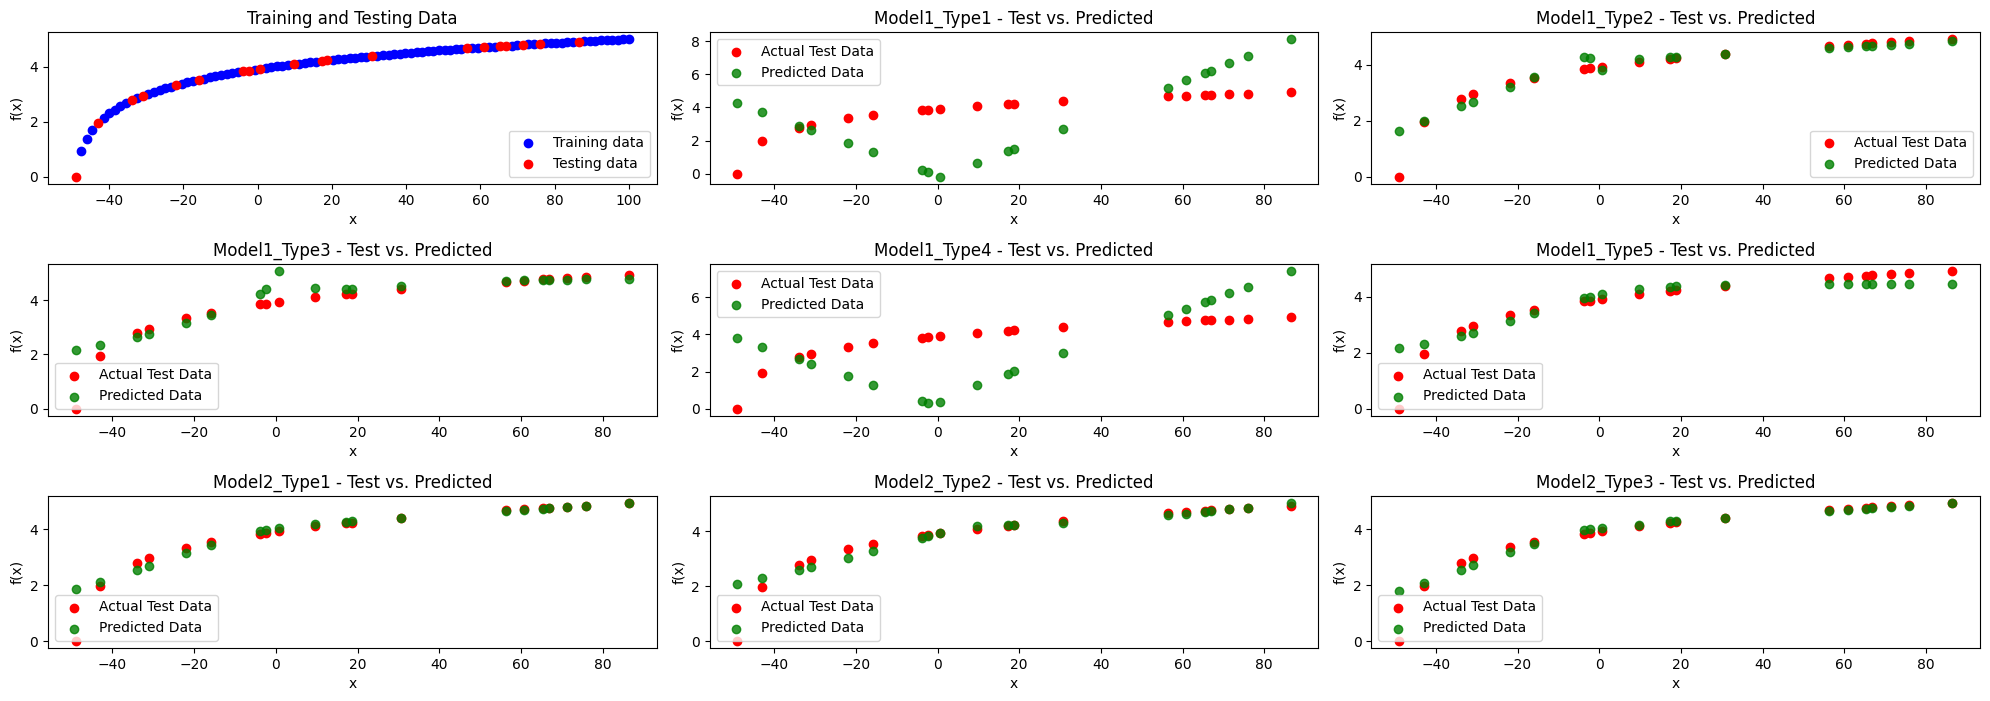

In [39]:
training_models(func_dict_1, 3)

Function 4

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


     Model Type           MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1   7549.167335  0.857143     0.800   -0.094615
1  Model1_Type2  17815.960665  0.960000     0.950   -1.583280
2  Model1_Type3   7649.883865  0.827586     0.750   -0.109219
3  Model1_Type4   7575.710680  0.872727     0.825   -0.098464
4  Model1_Type5   6936.878117  0.750000     0.600   -0.005834
5  Model2_Type1  18532.903240  0.960000     0.950   -1.687236
6  Model2_Type2   6915.865272  0.761905     0.625   -0.002787
7  Model2_Type3  22574.207667  0.979592     0.975   -2.273217


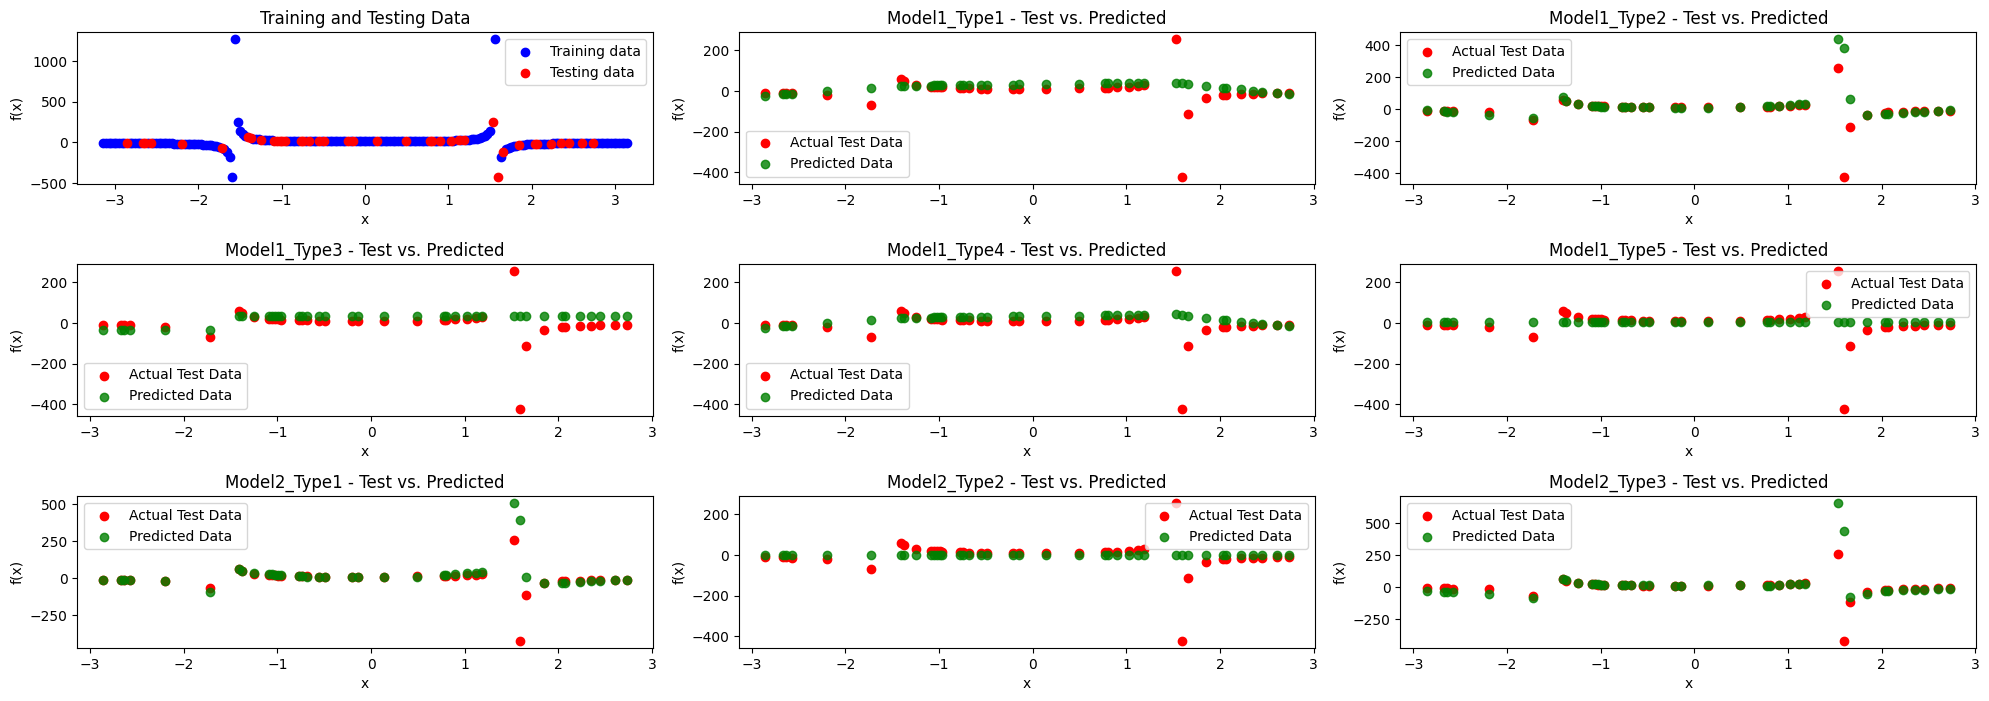

In [40]:
training_models(func_dict_1, 4)

Function 5

     Model Type       MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  0.010959  0.947368  0.971429    0.977725
1  Model1_Type2  0.001394  1.000000  1.000000    0.997167
2  Model1_Type3  0.005880  0.972973  0.985714    0.988048
3  Model1_Type4  0.013966  0.972973  0.985714    0.971613
4  Model1_Type5  0.172009  0.628571  0.814286    0.650373
5  Model2_Type1  0.002049  1.000000  1.000000    0.995836
6  Model2_Type2  0.000363  1.000000  1.000000    0.999263
7  Model2_Type3  0.000911  1.000000  1.000000    0.998149


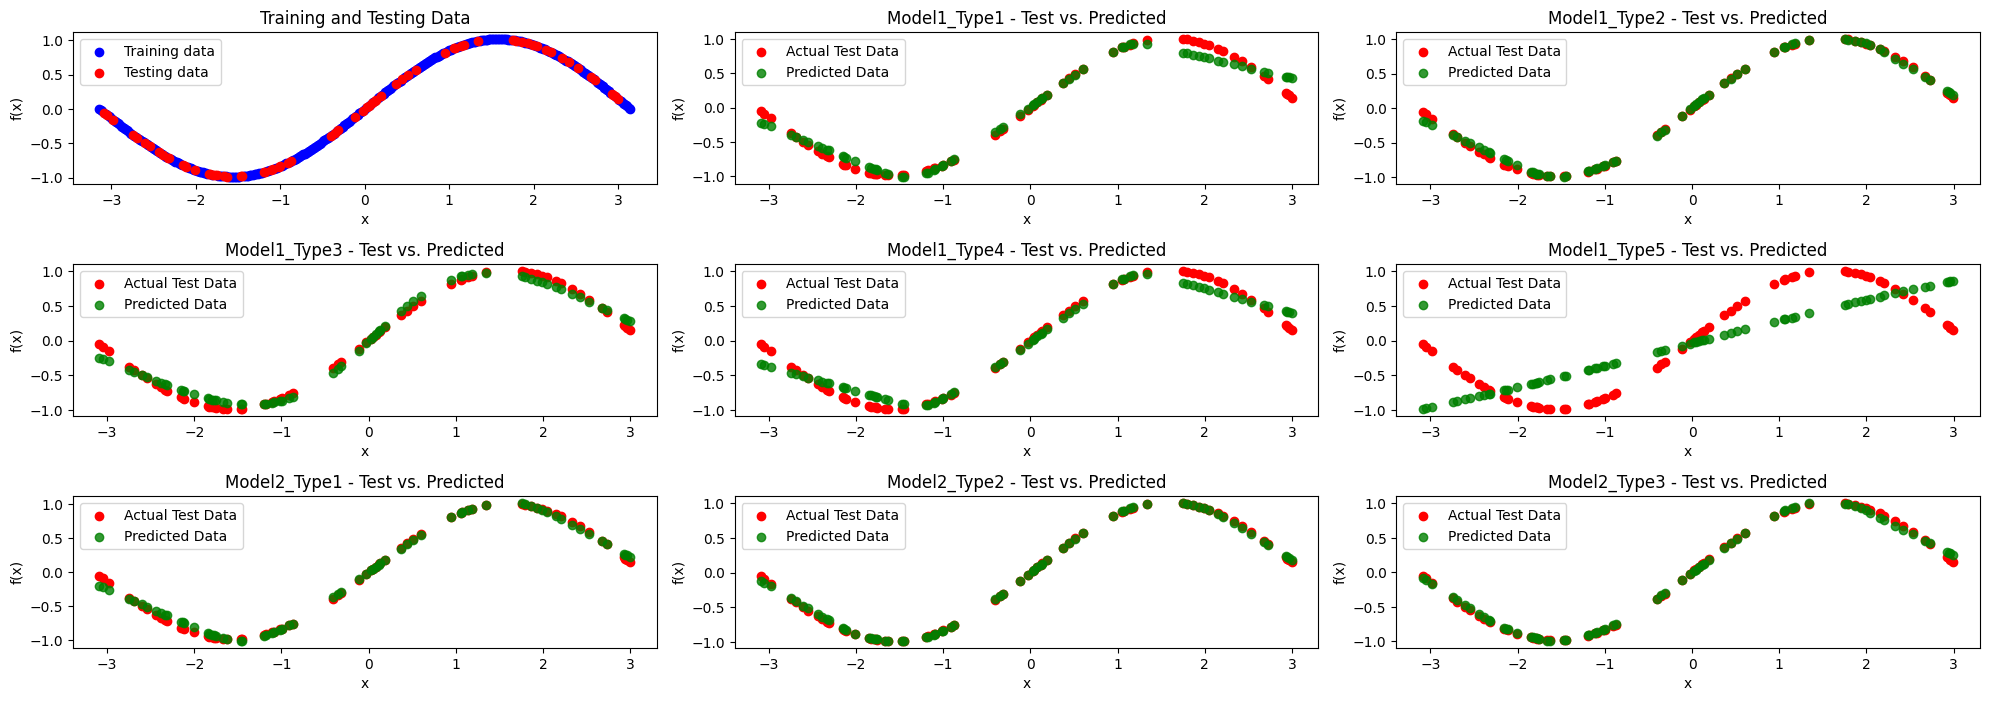

In [41]:
training_models(func_dict_1, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

     Model Type           MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1   4579.555618  0.000000       0.7   -0.092394
1  Model1_Type2   8588.948292  0.857143       0.9   -1.048782
2  Model1_Type3   4273.851746  0.500000       0.8   -0.019472
3  Model1_Type4   4617.858460  0.000000       0.7   -0.101530
4  Model1_Type5   5202.964001  0.000000       0.7   -0.241100
5  Model2_Type1   6349.785186  0.571429       0.7   -0.514659
6  Model2_Type2   5244.017825  0.000000       0.7   -0.250893
7  Model2_Type3  10267.886075  0.000000       0.7   -1.449271


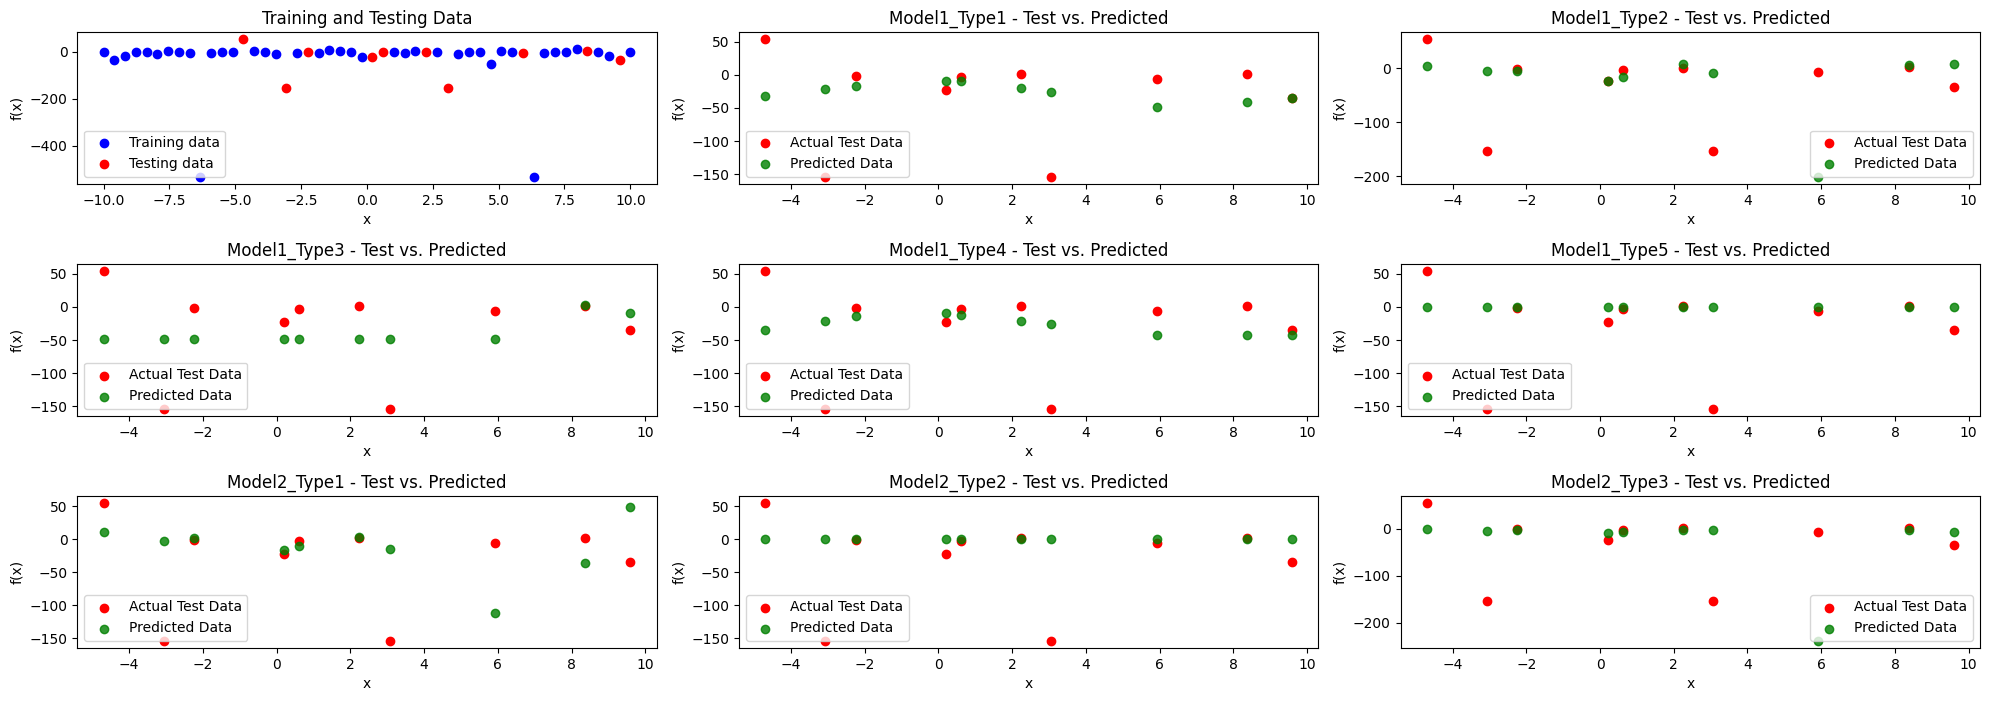

In [42]:
training_models(func_dict_2, 6)

     Model Type       MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  1.560592       0.0      0.25   -0.256108
1  Model1_Type2  1.498781       0.0      0.25   -0.206357
2  Model1_Type3  2.243701       0.0      0.25   -0.805936
3  Model1_Type4  3.864426       0.0      0.25   -2.110445
4  Model1_Type5  1.525496       0.0      0.25   -0.227859
5  Model2_Type1  3.451256       0.0      0.25   -1.777888
6  Model2_Type2  1.689126       0.0      0.25   -0.359564
7  Model2_Type3  1.139194       0.0      0.25    0.083072


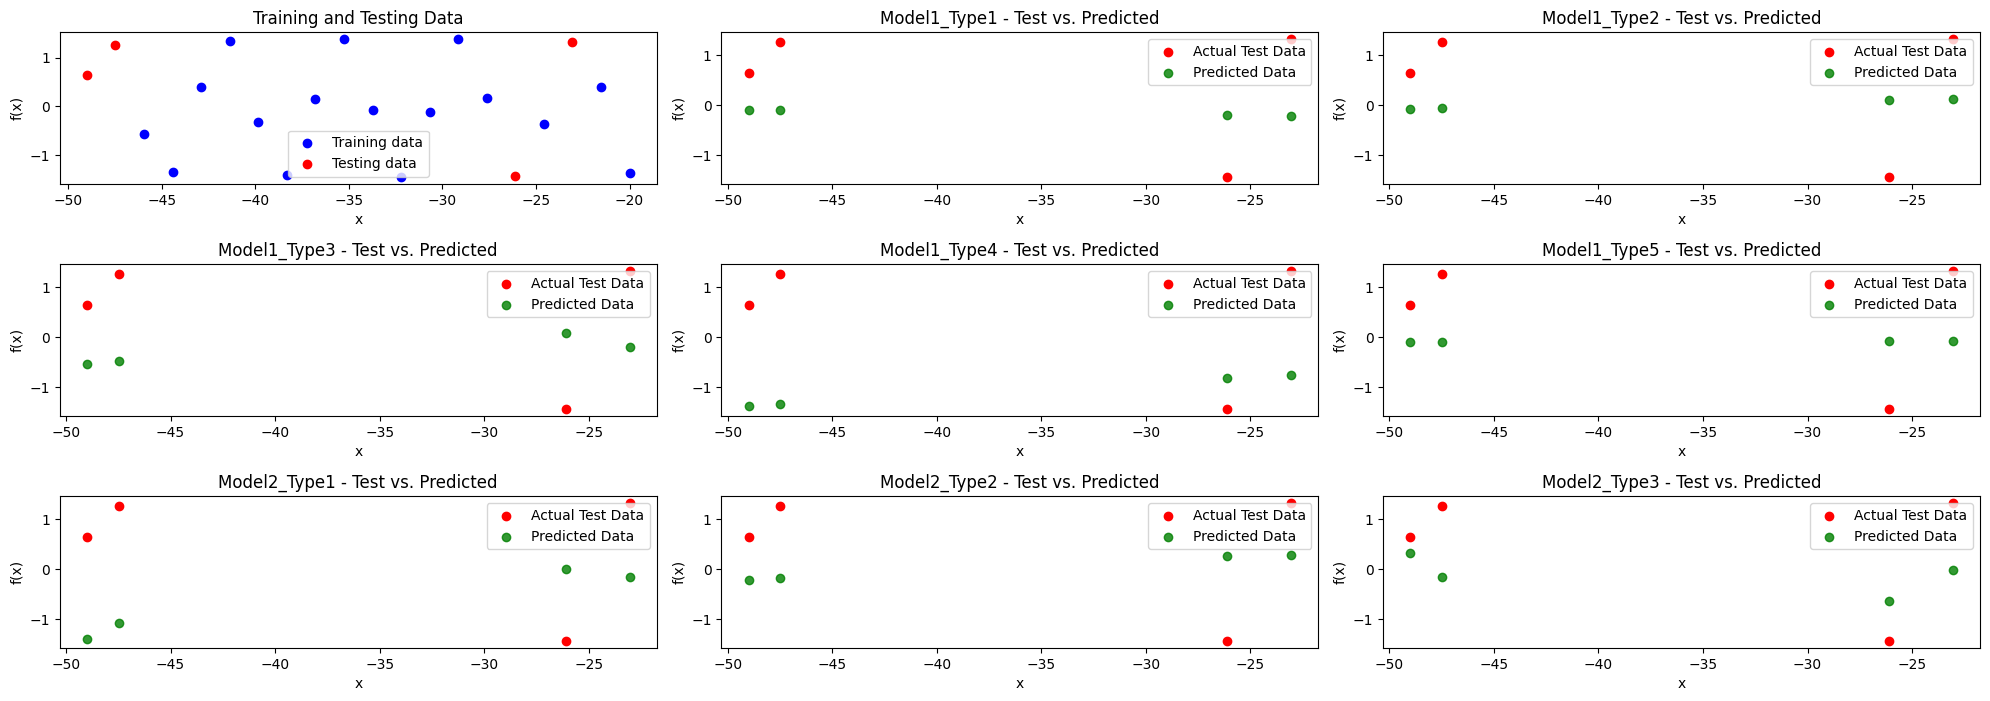

In [43]:
training_models(func_dict_2, 7)

     Model Type         MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1   93.985649  0.000000  0.500000   -0.380638
1  Model1_Type2   87.228534  0.000000  0.500000   -0.281377
2  Model1_Type3   79.806668  0.000000  0.500000   -0.172351
3  Model1_Type4   92.849934  0.000000  0.500000   -0.363955
4  Model1_Type5   69.901665  0.000000  0.500000   -0.026847
5  Model2_Type1  222.895652  0.444444  0.583333   -2.274311
6  Model2_Type2   68.433890  0.000000  0.500000   -0.005286
7  Model2_Type3  201.566330  0.500000  0.500000   -1.960986


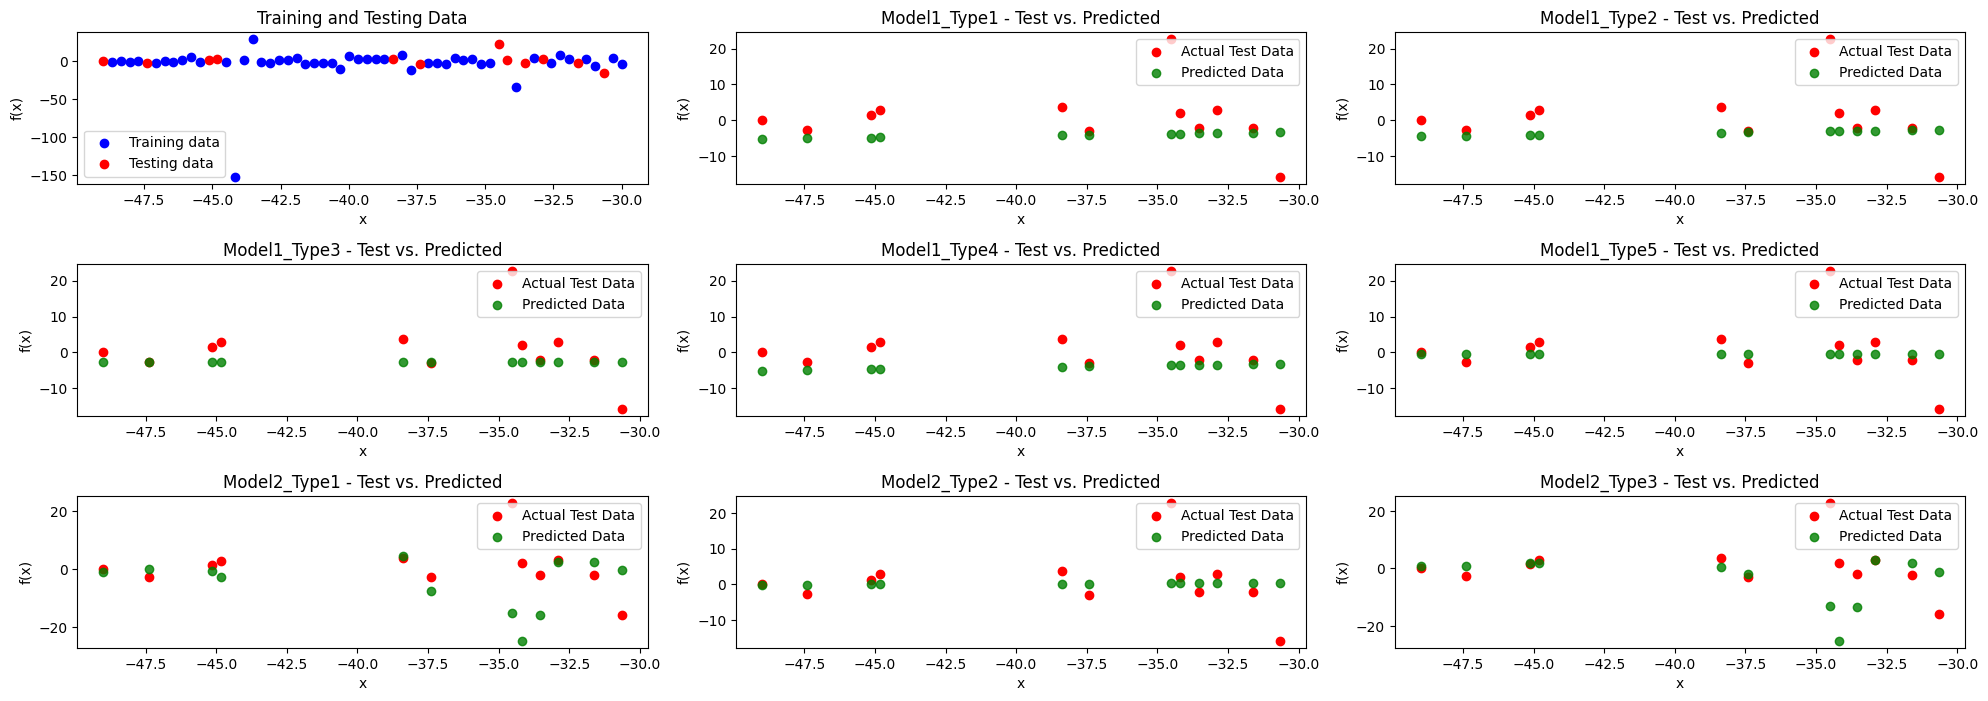

In [44]:
training_models(func_dict_2, 8)

     Model Type           MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  47020.127728  0.571429  0.500000   -0.215901
1  Model1_Type2  47143.046551  0.571429  0.500000   -0.219080
2  Model1_Type3  46743.685447  0.750000  0.666667   -0.208753
3  Model1_Type4  47009.932328  0.571429  0.500000   -0.215638
4  Model1_Type5  46968.882194  0.000000  0.166667   -0.214576
5  Model2_Type1  45941.255399  0.333333  0.333333   -0.188003
6  Model2_Type2  46884.026420  0.000000  0.166667   -0.212382
7  Model2_Type3  46198.561506  0.333333  0.333333   -0.194656


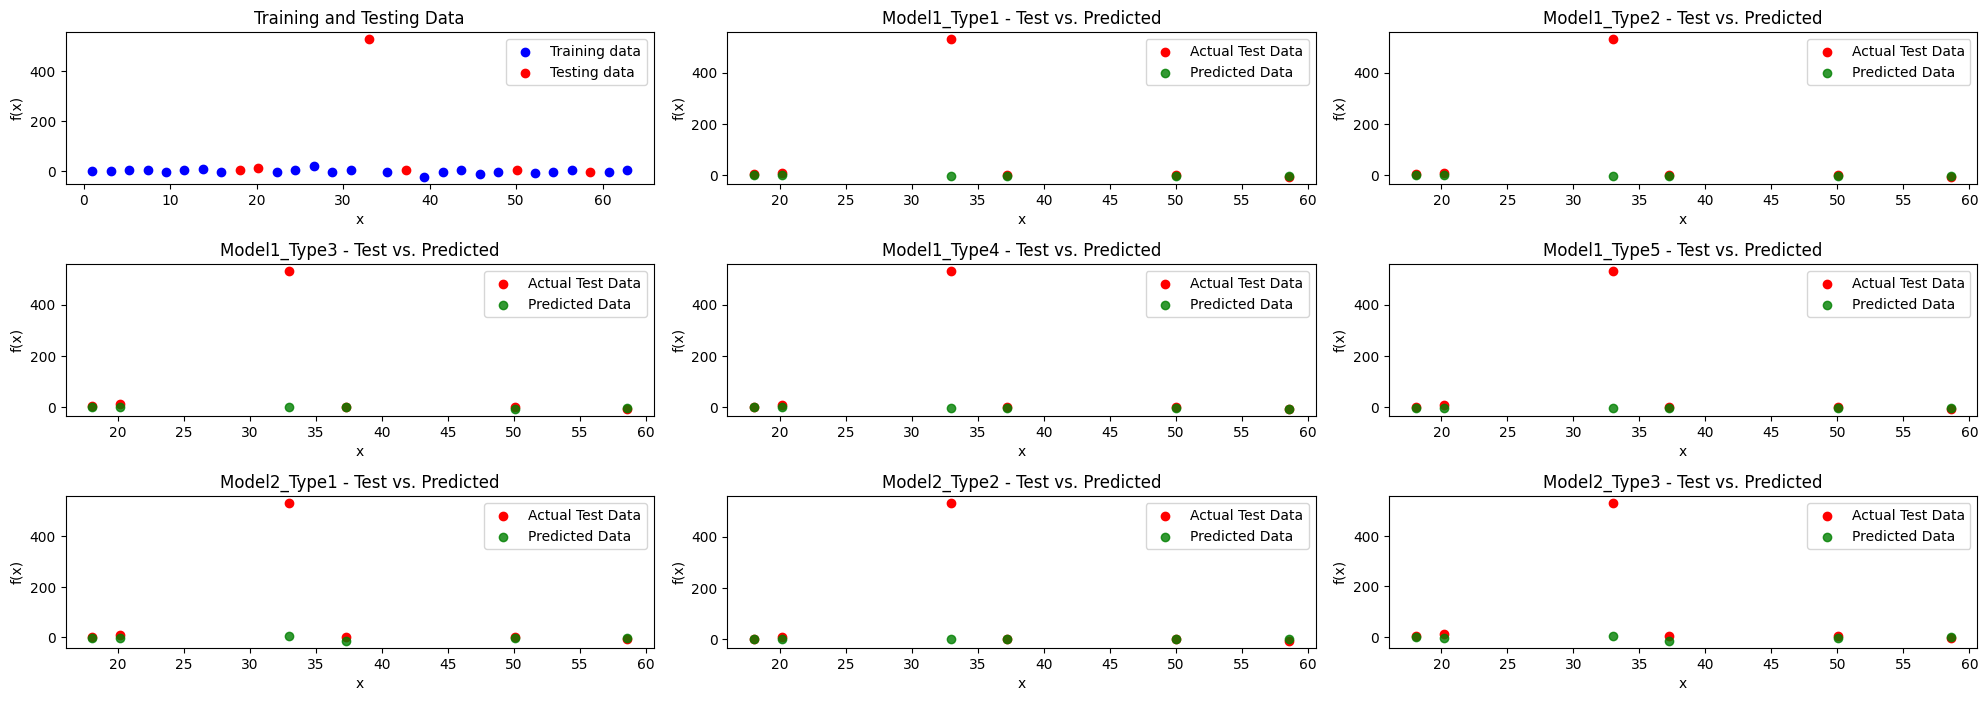

In [45]:
training_models(func_dict_2, 9)

Now we want to increase number of points to check whether our accuracy is going to get increased or not.

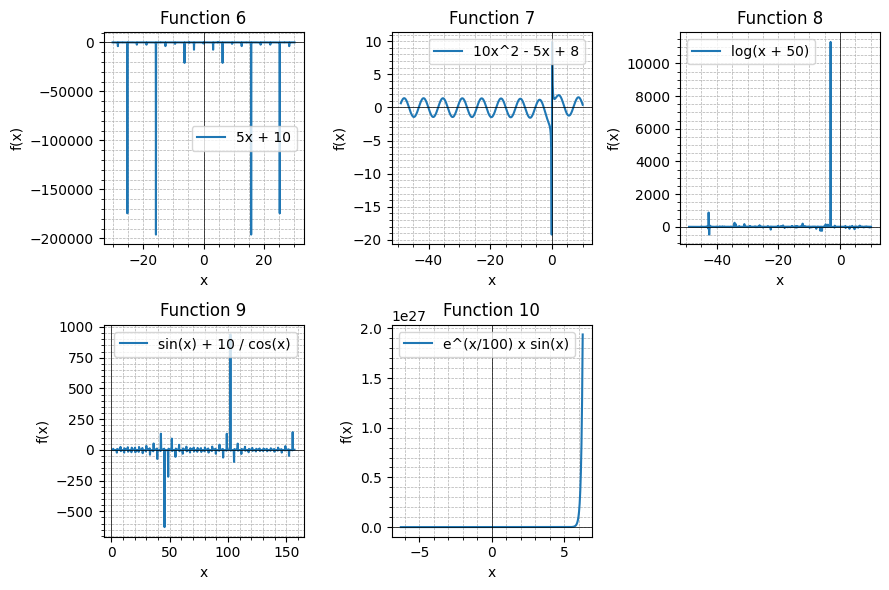

In [46]:
x_values_func6 = np.linspace(-30, 30, 1000)
x_values_func7 = np.linspace(-49, 10, 400)
x_values_func8 = np.linspace(-49, 10, 800)
x_values_func9 = np.linspace(1, 50*np.pi, 600)
x_values_func10 = np.linspace(-2*np.pi, 2*np.pi, 300)

func_dict_2 = {
    6: {'x': x_values_func6, 'y': function_6(x_values_func6), 'label': "5x + 10"},
    7: {'x': x_values_func7, 'y': function_7(x_values_func7), 'label': "10x^2 - 5x + 8"},
    8: {'x': x_values_func8, 'y': function_8(x_values_func8), 'label': "log(x + 50)"},
    9: {'x': x_values_func9, 'y': function_9(x_values_func9), 'label': "sin(x) + 10 / cos(x)"},
    10: {'x': x_values_func10, 'y': function_10(x_values_func10), 'label': "e^(x/100) x sin(x)"},
}

plot_functions(func_dict_2)

     Model Type           MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  1.942579e+08  0.000000     0.735   -0.004046
1  Model1_Type2  1.942611e+08  0.000000     0.735   -0.004063
2  Model1_Type3  1.939545e+08  0.000000     0.735   -0.002478
3  Model1_Type4  1.942485e+08  0.000000     0.735   -0.003998
4  Model1_Type5  1.947269e+08  0.000000     0.735   -0.006470
5  Model2_Type1  1.945664e+08  0.111111     0.680   -0.005641
6  Model2_Type2  1.947300e+08  0.000000     0.735   -0.006487
7  Model2_Type3  1.949762e+08  0.000000     0.735   -0.007759


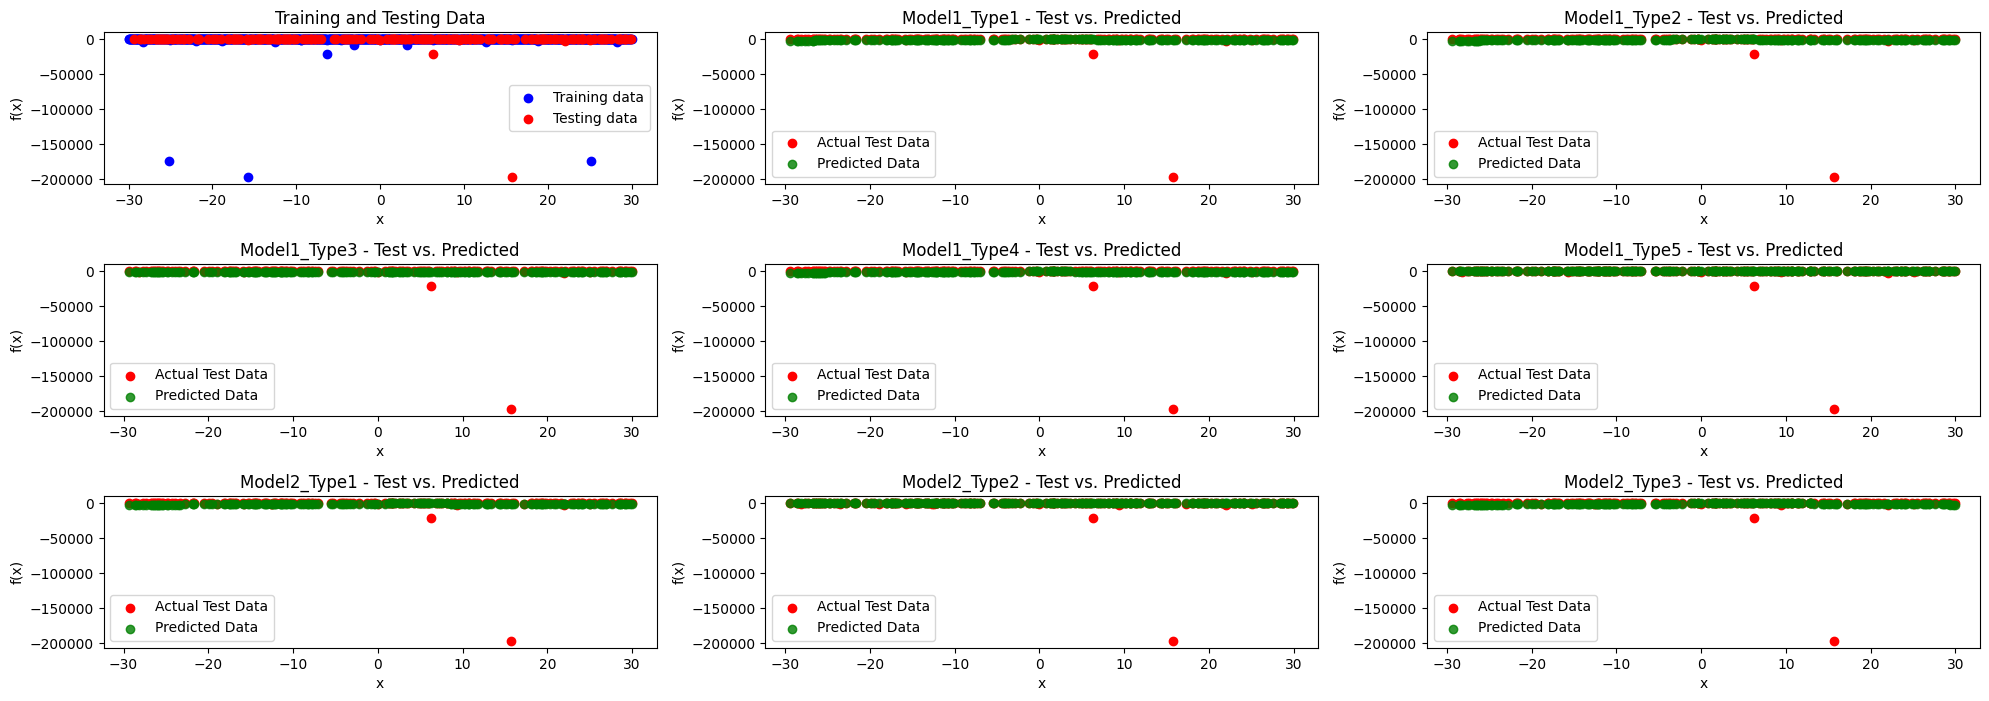

In [47]:
training_models(func_dict_2, 6)

     Model Type       MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  0.902737  0.347826     0.625    0.306784
1  Model1_Type2  0.864314  0.347826     0.625    0.336289
2  Model1_Type3  0.846262  0.416667     0.650    0.350151
3  Model1_Type4  1.237468  0.000000     0.525    0.049742
4  Model1_Type5  1.300716  0.000000     0.525    0.001174
5  Model2_Type1  1.209944  0.272727     0.600    0.070878
6  Model2_Type2  1.293572  0.000000     0.525    0.006660
7  Model2_Type3  0.567351  0.812500     0.850    0.564328


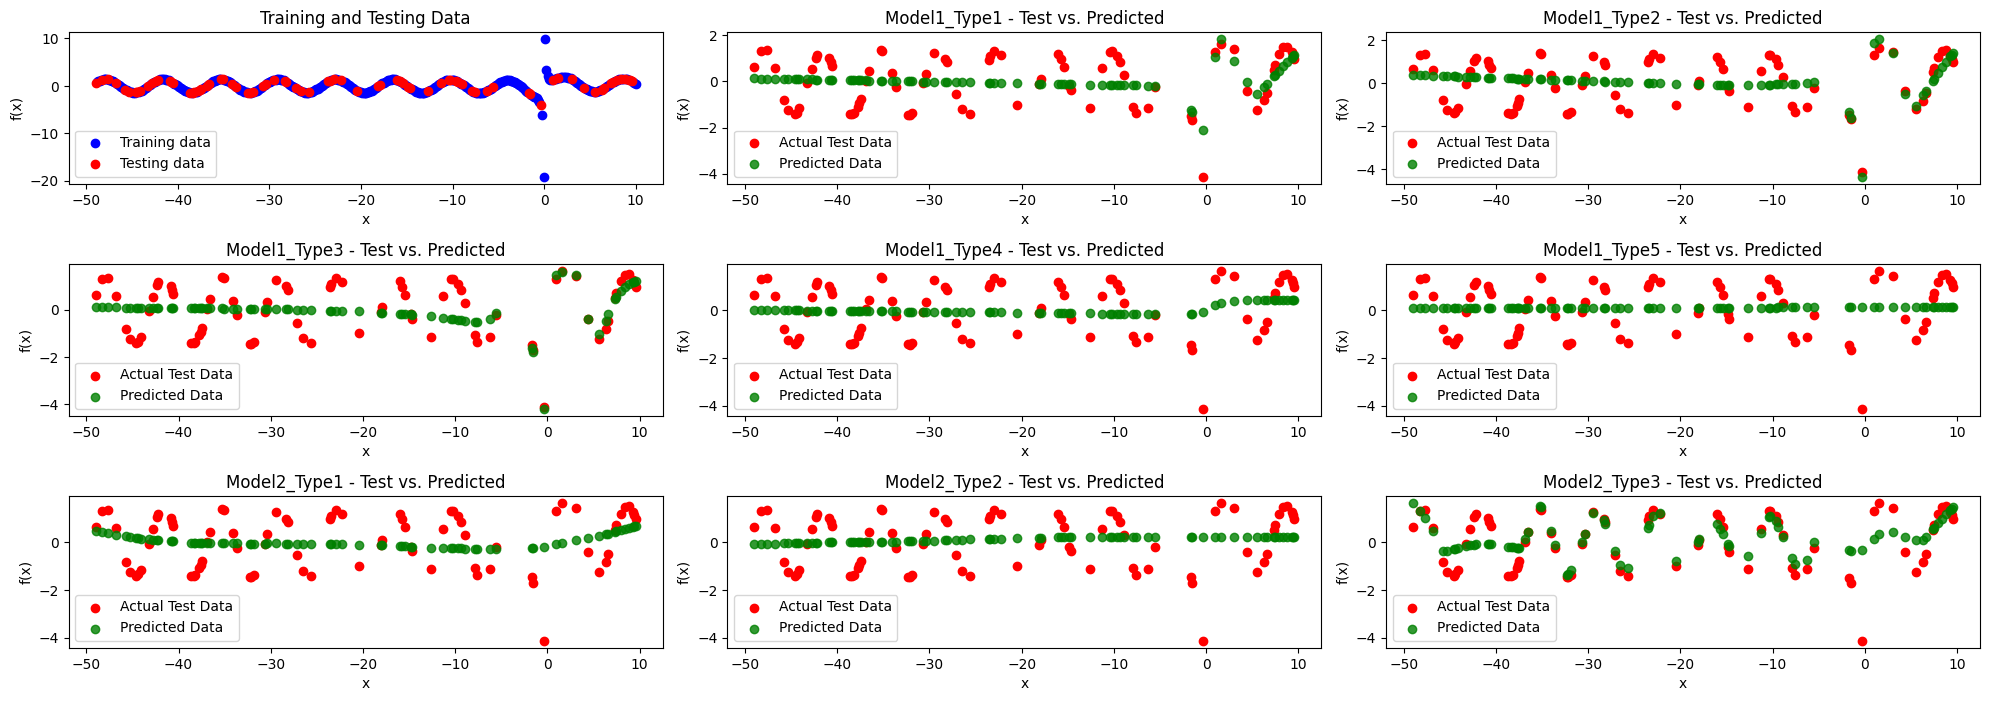

In [48]:
training_models(func_dict_2, 7)

     Model Type            MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  804725.289639  0.000000   0.51250   -0.007488
1  Model1_Type2  804662.455764  0.186047   0.56250   -0.007409
2  Model1_Type3  804711.128431  0.544444   0.48750   -0.007470
3  Model1_Type4  804728.690875  0.000000   0.51250   -0.007492
4  Model1_Type5  804767.817801  0.000000   0.51250   -0.007541
5  Model2_Type1  805064.328820  0.355556   0.45625   -0.007912
6  Model2_Type2  804844.388374  0.000000   0.51250   -0.007637
7  Model2_Type3  805037.633124  0.374101   0.45625   -0.007879


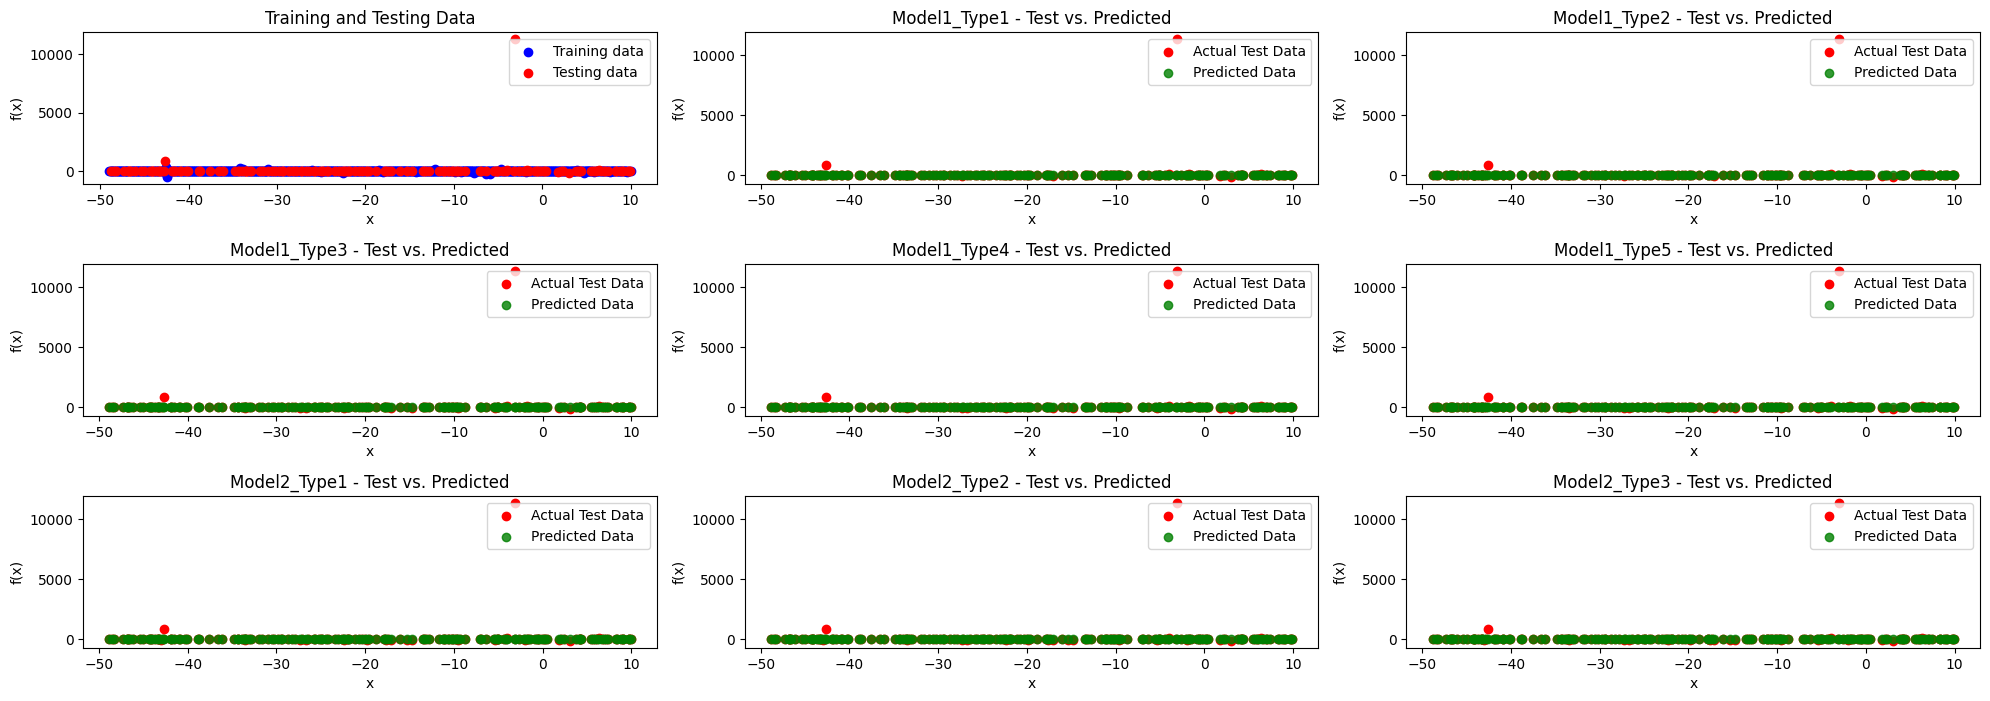

In [49]:
training_models(func_dict_2, 8)

     Model Type         MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  193.830740  0.613333  0.516667   -0.042795
1  Model1_Type2  187.107550  0.595745  0.525000   -0.006625
2  Model1_Type3  204.632426  0.483333  0.483333   -0.100907
3  Model1_Type4  187.649576  0.622754  0.475000   -0.009541
4  Model1_Type5  187.045372  0.000000  0.550000   -0.006290
5  Model2_Type1  264.887212  0.433333  0.433333   -0.425074
6  Model2_Type2  201.291999  0.410714  0.450000   -0.082936
7  Model2_Type3  288.562261  0.457627  0.466667   -0.552444


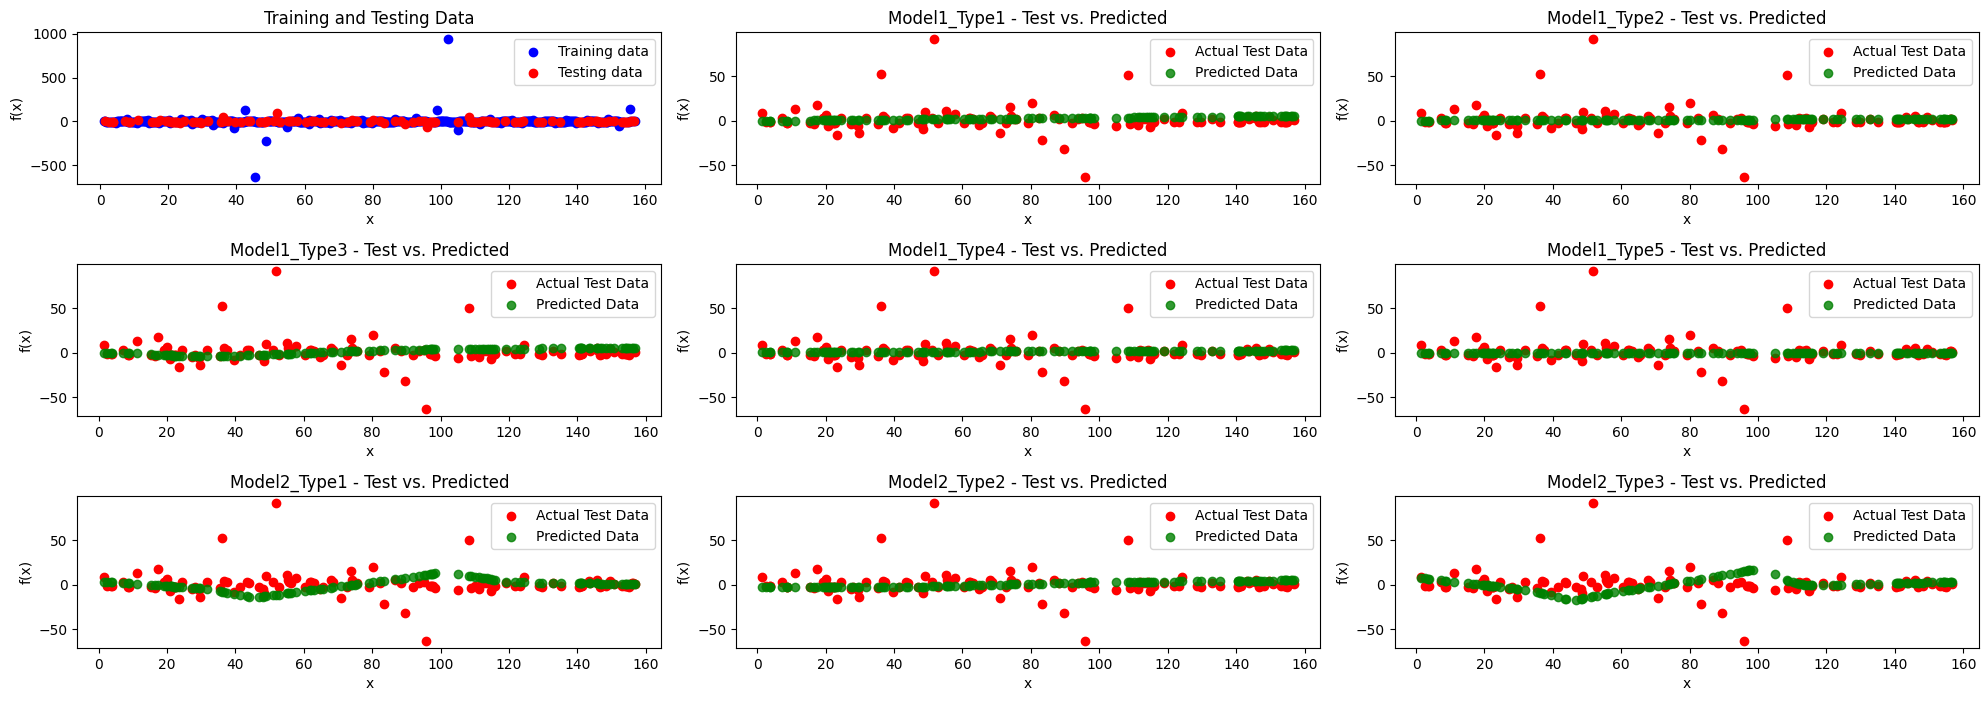

In [50]:
training_models(func_dict_2, 9)

     Model Type           MSE  F1 Score  Accuracy  Test Score
0  Model1_Type1  1.384913e+52  0.439024  0.616667   -0.031608
1  Model1_Type2  1.384913e+52  0.984615  0.983333   -0.031608
2  Model1_Type3  1.384913e+52  1.000000  1.000000   -0.031608
3  Model1_Type4  1.384913e+52  0.950820  0.950000   -0.031608
4  Model1_Type5  1.384913e+52  0.000000  0.466667   -0.031608
5  Model2_Type1  1.384913e+52  0.695652  0.533333   -0.031608
6  Model2_Type2  1.384913e+52  0.000000  0.466667   -0.031608
7  Model2_Type3  1.384913e+52  0.800000  0.816667   -0.031608


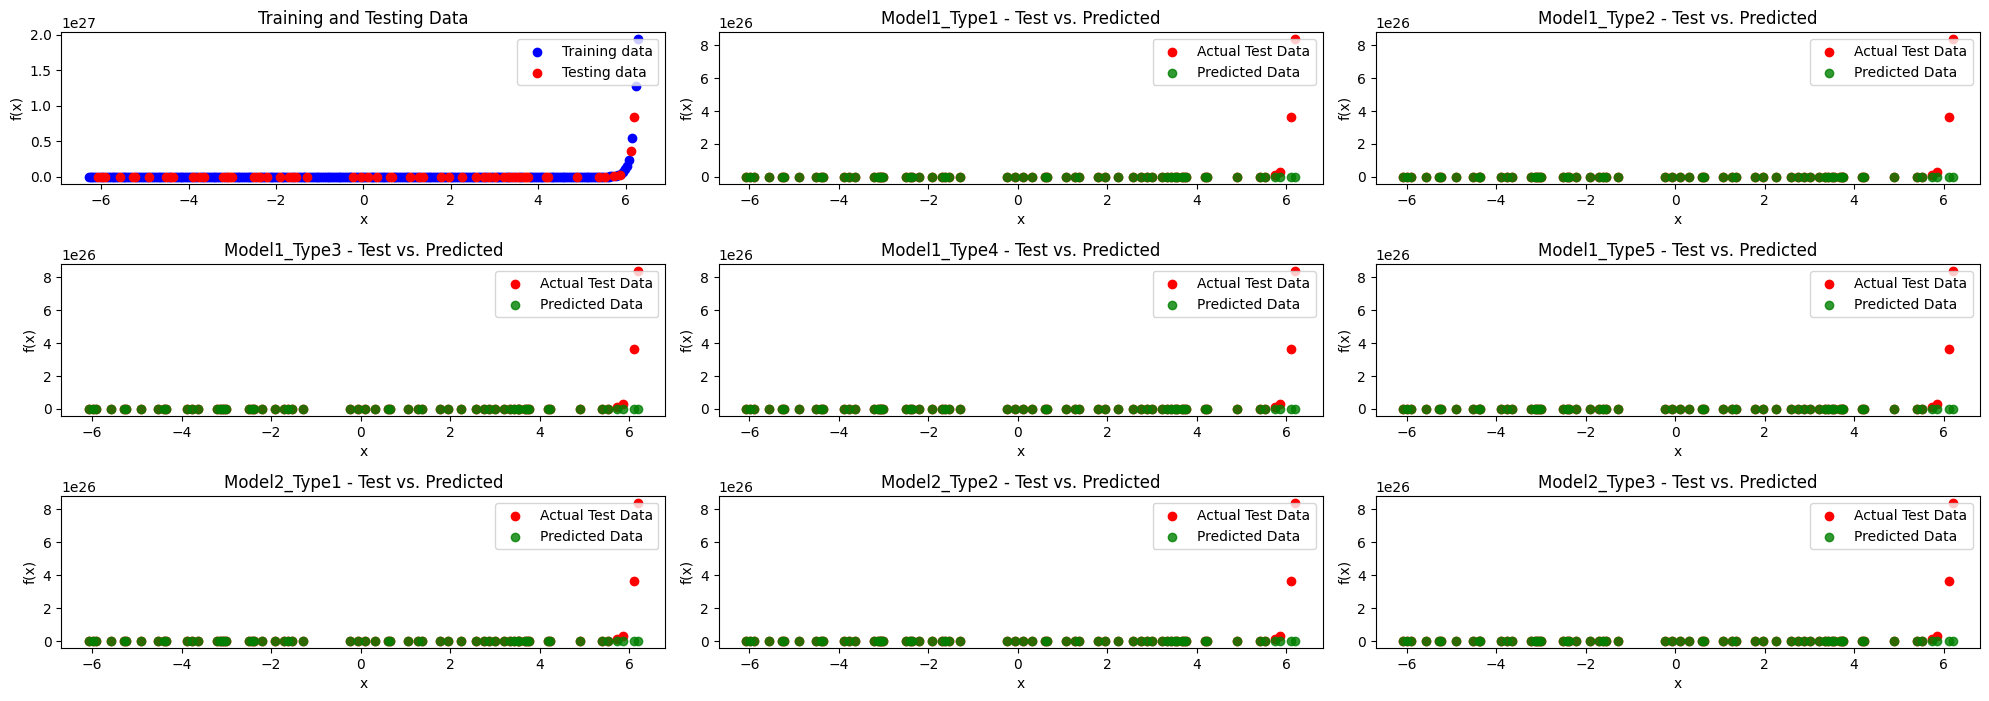

In [51]:
training_models(func_dict_2, 10)

# Part 2

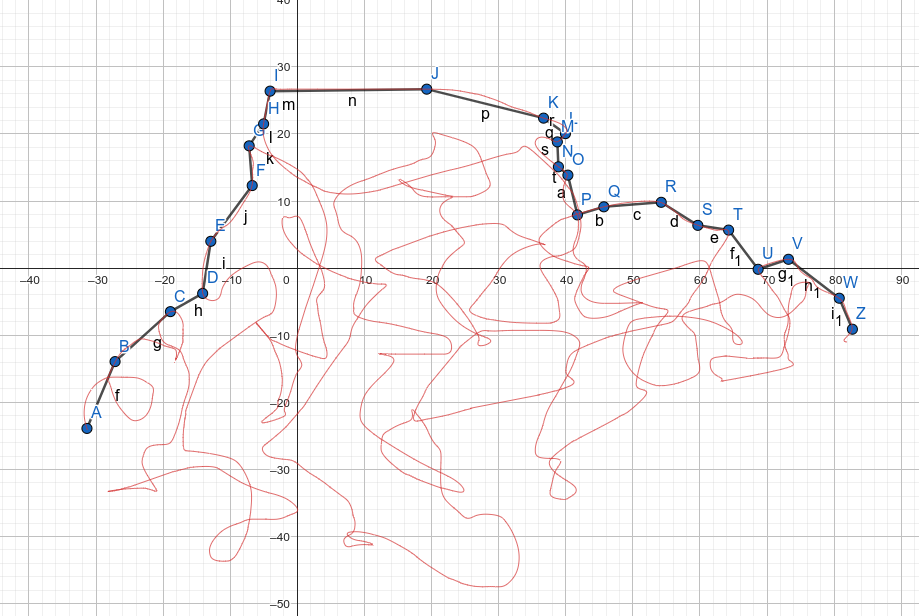





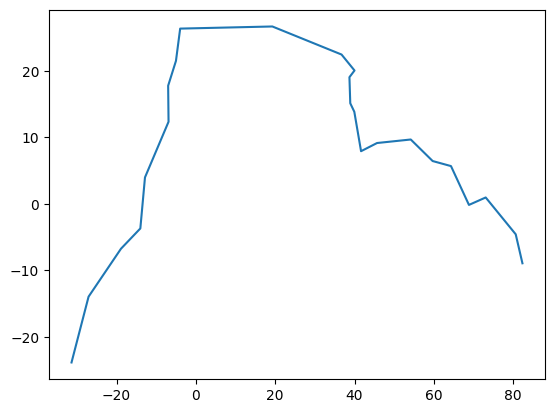

In [52]:
x_total = np.array([-31.35, -27.05, -18.88, -14, -12.83, -6.89, -6.99, -5.02, -3.96, 19.28, 36.72, 39.99, 38.71, 38.92, 39.94, 41.64, 45.67, 54.17, 59.69, 64.31, 68.84, 73.06, 80.63, 82.32])
y_total = np.array([-23.88, -13.98, -6.77, -3.72, 3.96, 12.33, 17.75, 21.49, 26.34, 26.66, 22.44, 20.04, 19.03, 15.11, 13.83, 7.90, 9.13, 9.66, 6.42, 5.66, -0.18, 0.94, -4.60, -8.96])
fig, ax = plt.subplots()
ax.plot(x_total, y_total)

In [53]:
x_total = x_total.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=42)

In [54]:
def mlp_model1(type):
    match type:
        case 1:
            return MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=3000, random_state=42, tol=1e-4)
        case 2:
            return MLPRegressor(hidden_layer_sizes=(150, 100), activation='relu', solver='sgd', max_iter=3000, random_state=42, learning_rate_init=0.0005, tol=1e-4)
        case 3:
            return MLPRegressor(hidden_layer_sizes=(100, 75, 50), activation='tanh', solver='lbfgs', max_iter=3000, random_state=42, tol=1e-4)
        case 4:
            return MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=4000, random_state=42, tol=1e-4)
        case 5:
            return MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='sgd', max_iter=3000, early_stopping=True, random_state=42, learning_rate_init=0.0001, tol=1e-4)
        case 6:
            return MLPRegressor(hidden_layer_sizes=(200,), activation='relu', solver='lbfgs', max_iter=2000, random_state=42, tol=1e-4)
        case _ :
            return

def mlp_model2(type):
    match type:
        case 1:
            return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=3000, random_state=42, tol=1e-4))
        case 2:
            return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='sgd', max_iter=3000, random_state=42, alpha=0.001, early_stopping=True, tol=1e-4))
        case 3:
            return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(120, 80, 40), activation='relu', solver='lbfgs', max_iter=3000, random_state=42, tol=1e-4))
        case 4:
            return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(150, 100, 50), activation='tanh', solver='adam', max_iter=2000, random_state=42, tol=1e-4))
        case 5:
            return make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='sgd', max_iter=3000, random_state=42, learning_rate='adaptive', tol=1e-4))
        case _ :
            return


Model 1 Type 1 Training Score:  -0.30507848185352904
Model 1 Type 1 Testing Score:  0.09632430242874934
Model 1 Type 2 Training Score:  0.35035042671100547
Model 1 Type 2 Testing Score:  0.61188250478368


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model 1 Type 3 Training Score:  0.9939394276603529
Model 1 Type 3 Testing Score:  0.8300028729762504


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 1 Type 4 Training Score:  0.9325909719378548
Model 1 Type 4 Testing Score:  0.9566206453230628
Model 1 Type 5 Training Score:  -0.3720590061730691
Model 1 Type 5 Testing Score:  -0.17185563940468396
Model 1 Type 6 Training Score:  0.9335905677023478
Model 1 Type 6 Testing Score:  0.9685025501979486
Model 2 Type 1 Training Score:  0.9437999497668231
Model 2 Type 1 Testing Score:  0.9197747129009773
Model 2 Type 2 Training Score:  -0.37784596009285654
Model 2 Type 2 Testing Score:  -0.17267573011568693
Model 2 Type 3 Training Score:  0.9798296995243433
Model 2 Type 3 Testing Score:  0.9416906631041804


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 2 Type 4 Training Score:  0.9032036346151583
Model 2 Type 4 Testing Score:  0.6930711389037365
Model 2 Type 5 Training Score:  0.9163204997445115
Model 2 Type 5 Testing Score:  0.9420057738868028


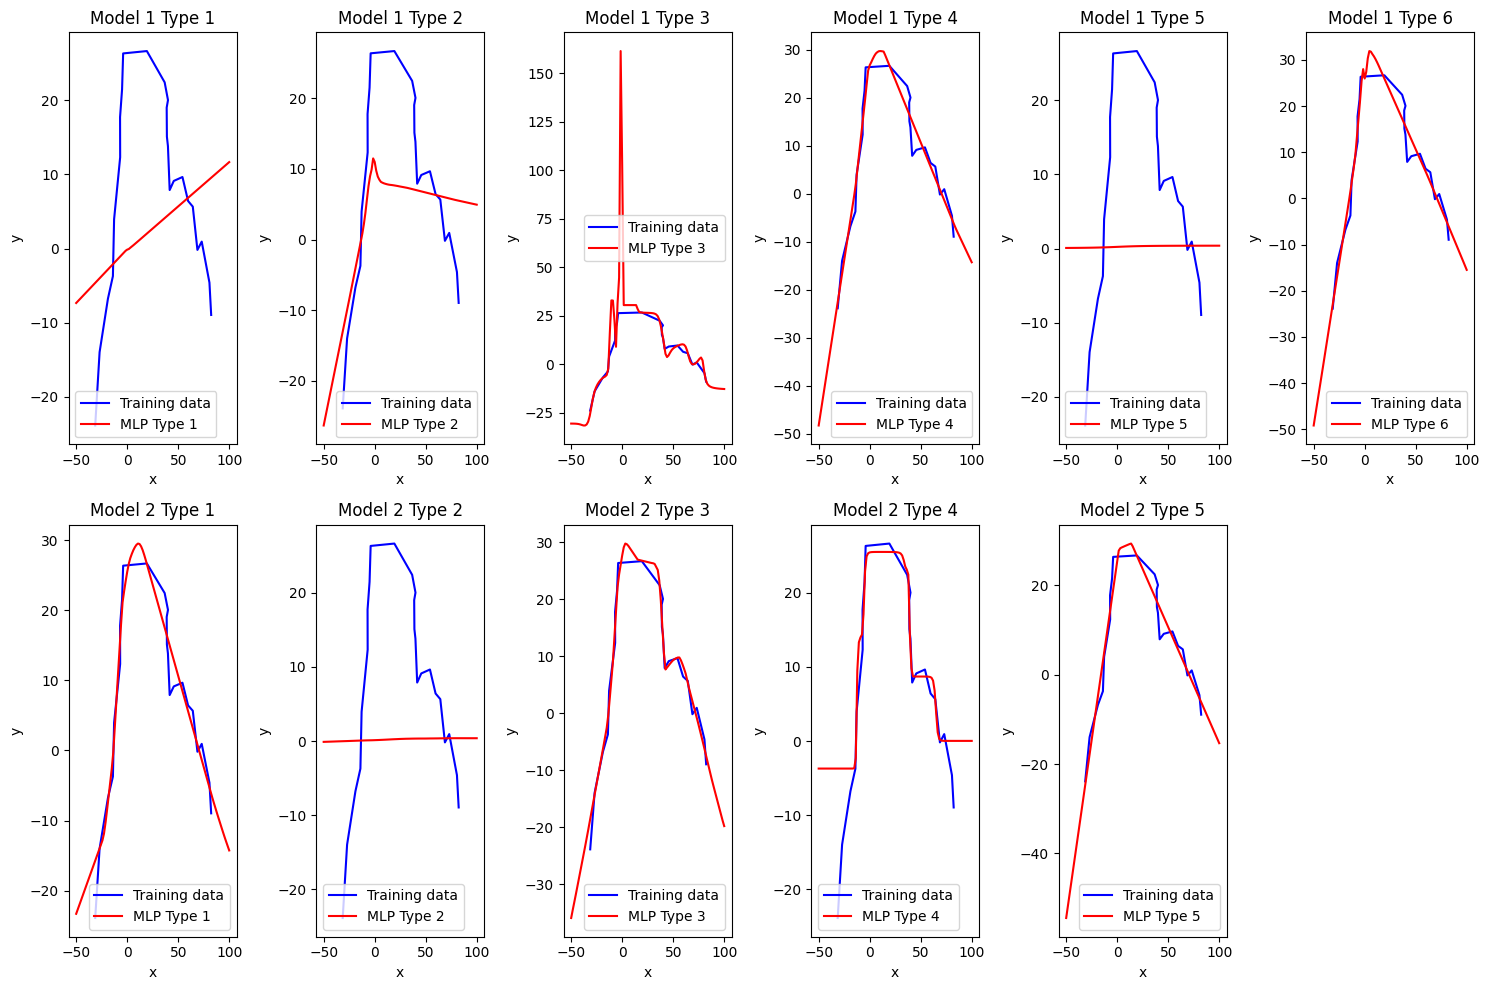

In [55]:
plt.figure(figsize=(15, 10))

model_functions = [mlp_model1, mlp_model2]
model_types = [6, 5]

for i, model_func in enumerate(model_functions, start=1):
    for j in range(1, model_types[i-1] + 1):
        model = model_func(j)
        if model is None:
            continue
        model.fit(X_train, y_train)
        x_values = np.linspace(-50, 100, 100).reshape(-1, 1)
        y_pred = model.predict(x_values)

        plt.subplot(2, 6, (i-1)*6 + j)
        plt.plot(x_total, y_total, 'b-', label='Training data')
        plt.plot(x_values, y_pred, 'r-', label=f'MLP Type {j}')
        plt.title(f'Model {i} Type {j}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        print(f"Model {i} Type {j} Training Score: ", model.score(X_train, y_train))
        print(f"Model {i} Type {j} Testing Score: ", model.score(X_test, y_test))

plt.tight_layout()
plt.show()
